In [1]:
import numpy as np

## using Numpy

In [2]:
def kmeans_init(data, k):
    centroids = [data[np.random.choice(len(data))]]
    
    for _ in range(1, k):
        distances = np.array([min([np.linalg.norm(c-point) for c in centroids]) for point in data])
        probabilities = distances/distances.sum()
        next_centroid_index = np.random.choice(len(data), p=probabilities)
        centroids.append(data[next_centroid_index])
    return np.array(centroids)

In [3]:
def kmeans(data, k, max_iters = 100):
    #Initialize centroids using Kmeans ++
    centroids = kmeans_init(data, k)
    for _ in range(max_iters):
        #Assign each point to the nearest centroid
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
        
        #update the centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        #Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels

In [4]:
np.random.seed(0)
#Generate the synthetic data
data = np.concatenate([np.random.randn(50,2)* 0.5 + np.array([2,2]),
                      np.random.randn(50, 2)* 0.5 + np.array([-2,-2])
                      ])

In [5]:
data

array([[ 2.88202617,  2.2000786 ],
       [ 2.48936899,  3.1204466 ],
       [ 2.933779  ,  1.51136106],
       [ 2.47504421,  1.9243214 ],
       [ 1.94839057,  2.20529925],
       [ 2.07202179,  2.72713675],
       [ 2.38051886,  2.06083751],
       [ 2.22193162,  2.16683716],
       [ 2.74703954,  1.89742087],
       [ 2.15653385,  1.57295213],
       [ 0.72350509,  2.3268093 ],
       [ 2.4322181 ,  1.62891749],
       [ 3.13487731,  1.27281716],
       [ 2.02287926,  1.90640807],
       [ 2.76638961,  2.73467938],
       [ 2.07747371,  2.18908126],
       [ 1.55610713,  1.00960177],
       [ 1.82604393,  2.07817448],
       [ 2.61514534,  2.60118992],
       [ 1.80633659,  1.84884862],
       [ 1.47572352,  1.28999103],
       [ 1.1468649 ,  2.9753877 ],
       [ 1.74517391,  1.78096285],
       [ 1.37360232,  2.38874518],
       [ 1.19305108,  1.89362986],
       [ 1.55226672,  2.19345125],
       [ 1.74459743,  1.40968391],
       [ 1.98590889,  2.21416594],
       [ 2.03325861,

In [6]:
#Run the k means clustering
k = 2
final_centroid, cluster_labels = kmeans(data, k)


In [7]:
import matplotlib.pyplot as plt

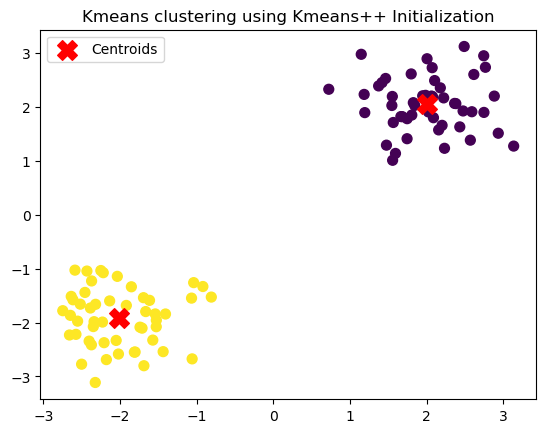

In [8]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(final_centroid[:, 0], final_centroid[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans clustering using Kmeans++ Initialization')
plt.legend()
plt.show()

### using Sklearn

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
cluster_labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

C:\Users\ramsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


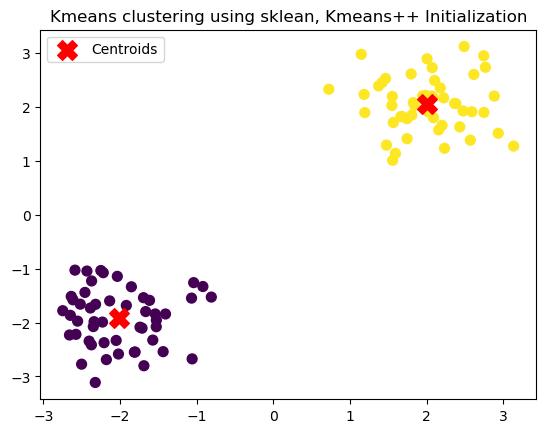

In [11]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans clustering using sklean, Kmeans++ Initialization')
plt.legend()
plt.show()